<a href="https://colab.research.google.com/github/rahuldf/rahuldf.github.io/blob/main/car_resale_price/used_car_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
# data from kaggle - https://www.kaggle.com/datasets/sujay1844/used-car-prices/

df = pd.read_csv("used_car_prices.csv")
df.drop(columns= ['Unnamed: 0'], inplace = True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
5843,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
5844,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
5845,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [3]:
df.drop(df[df['Seats'].isna()].index, inplace = True)
df.drop(df[df['Mileage'].isna()].index, inplace = True)

In [4]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            4993
Price                   0
dtype: int64

In [5]:
df['Brand'] = df['Name'].apply(lambda x: x.split()[0])
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,Nissan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,Maruti
5843,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,Hyundai
5844,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,Mahindra
5845,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,Maruti


<Axes: >

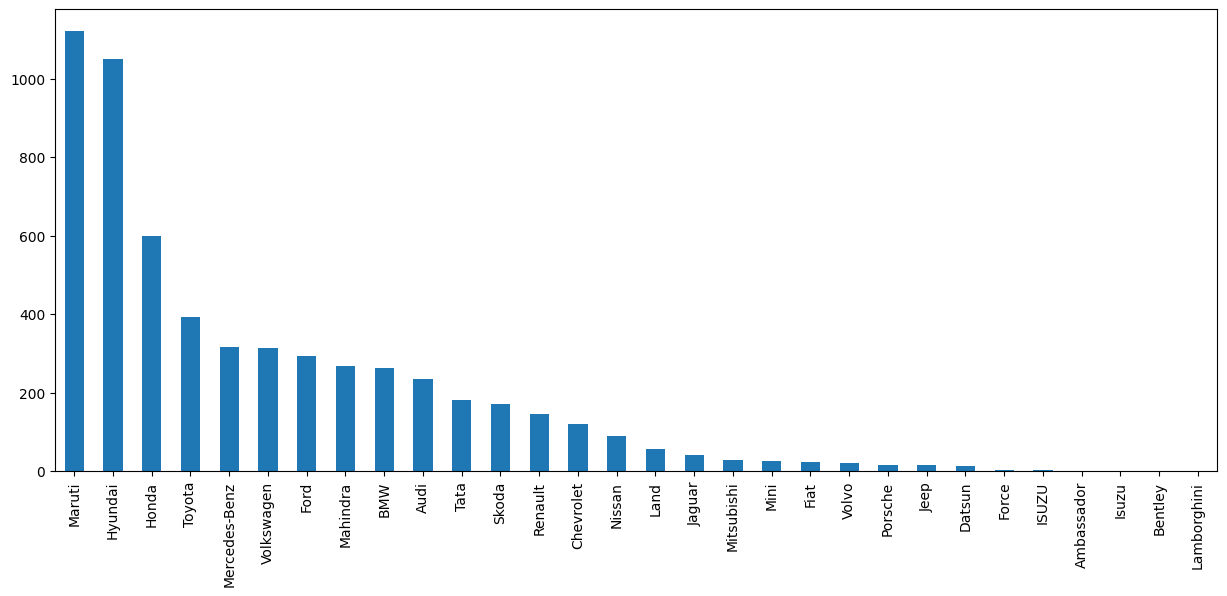

In [6]:
df['Brand'].value_counts().plot(kind = 'bar', figsize=(15,6))

In [7]:
# df['Mileage'][0].split()[-1]
df['Mileage_Unit'] = df['Mileage'].apply(lambda x: str(x).split()[-1])
df['Mileage_Unit'].value_counts()

kmpl     5804
km/kg       3
Name: Mileage_Unit, dtype: int64

In [8]:
df['Mileage_Value'] = df['Mileage'].apply(lambda x: str(x).split()[0])
df['Mileage_Value'] = df['Mileage_Value'].apply(pd.to_numeric)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Mileage_Unit,Mileage_Value
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,kmpl,19.67
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,km/kg,13.00
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,kmpl,20.77
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,kmpl,15.20
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,Nissan,kmpl,23.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,Maruti,kmpl,28.40
5843,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,Hyundai,kmpl,24.40
5844,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,Mahindra,kmpl,14.00
5845,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,Maruti,kmpl,18.90


In [9]:
df.drop(df[df['Mileage_Value'] == 0.0].index, inplace = True)

In [10]:
df['Engine_Unit'] = df['Engine'].apply(lambda x: str(x).split()[-1])
df['Engine_Value'] = df['Engine'].apply(lambda x: str(x).split()[0])
df['Engine_Value'] = df['Engine_Value'].apply(pd.to_numeric)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Mileage_Unit,Mileage_Value,Engine_Unit,Engine_Value
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,kmpl,19.67,CC,1582
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,km/kg,13.00,CC,1199
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,kmpl,20.77,CC,1248
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,kmpl,15.20,CC,1968
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,Nissan,kmpl,23.08,CC,1461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,Maruti,kmpl,28.40,CC,1248
5843,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,Hyundai,kmpl,24.40,CC,1120
5844,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,Mahindra,kmpl,14.00,CC,2498
5845,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,Maruti,kmpl,18.90,CC,998


In [11]:
df['Power_Unit'] = df['Power'].apply(lambda x: str(x).split()[-1])
df['Power_Value'] = df['Power'].apply(lambda x: str(x).split()[0])
df['Power_Value'] = df['Power_Value'].apply(pd.to_numeric)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Mileage_Unit,Mileage_Value,Engine_Unit,Engine_Value,Power_Unit,Power_Value
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,kmpl,19.67,CC,1582,bhp,126.20
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,km/kg,13.00,CC,1199,bhp,88.70
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,kmpl,20.77,CC,1248,bhp,88.76
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,kmpl,15.20,CC,1968,bhp,140.80
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,Nissan,kmpl,23.08,CC,1461,bhp,63.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,Maruti,kmpl,28.40,CC,1248,bhp,74.00
5843,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,Hyundai,kmpl,24.40,CC,1120,bhp,71.00
5844,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,Mahindra,kmpl,14.00,CC,2498,bhp,112.00
5845,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,Maruti,kmpl,18.90,CC,998,bhp,67.10


In [12]:
df.drop(df[df['Seats'] >= 9].index, inplace = True)
df.drop(df[df['Year'] <= 2001].index, inplace = True)
df.drop(df[(df['Brand'] == 'Force') | (df['Brand'] == 'ISUZU') | (df['Brand'] == 'Ambassador') | (df['Brand'] == 'Isuzu') | (df['Brand'] == 'Bentley') | (df['Brand'] == 'Lamborghini')].index, inplace = True)

In [13]:
df['Brand'].value_counts().to_dict()

{'Maruti': 1116,
 'Hyundai': 1041,
 'Honda': 598,
 'Toyota': 391,
 'Volkswagen': 314,
 'Mercedes-Benz': 303,
 'Ford': 294,
 'Mahindra': 265,
 'BMW': 262,
 'Audi': 234,
 'Tata': 179,
 'Skoda': 170,
 'Renault': 145,
 'Chevrolet': 118,
 'Nissan': 89,
 'Land': 51,
 'Jaguar': 40,
 'Mitsubishi': 26,
 'Mini': 26,
 'Fiat': 23,
 'Volvo': 21,
 'Porsche': 16,
 'Jeep': 15,
 'Datsun': 13}

In [14]:
df['Petrol_1_diesel_0'] = df['Fuel_Type'].map({'Petrol': 1, 'Diesel': 0})
df['Manual_1_automatic_0'] = df['Transmission'].map({'Manual': 1, 'Automatic': 0})
df['Owner_Type_reg'] = df['Owner_Type'].map({'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4})
df['Brand_reg'] = df['Brand'].map(df['Brand'].value_counts().to_dict())
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Mileage_Unit,Mileage_Value,Engine_Unit,Engine_Value,Power_Unit,Power_Value,Petrol_1_diesel_0,Manual_1_automatic_0,Owner_Type_reg,Brand_reg
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,...,kmpl,19.67,CC,1582,bhp,126.20,0,1,1,1041
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,...,km/kg,13.00,CC,1199,bhp,88.70,1,1,1,598
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,...,kmpl,20.77,CC,1248,bhp,88.76,0,1,1,1116
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,...,kmpl,15.20,CC,1968,bhp,140.80,0,0,2,234
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,...,kmpl,23.08,CC,1461,bhp,63.10,0,1,1,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,...,kmpl,28.40,CC,1248,bhp,74.00,0,1,1,1116
5843,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,...,kmpl,24.40,CC,1120,bhp,71.00,0,1,1,1041
5844,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,...,kmpl,14.00,CC,2498,bhp,112.00,0,1,2,265
5845,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,...,kmpl,18.90,CC,998,bhp,67.10,1,1,1,1116


In [15]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Mileage_Unit', 'Mileage_Value',
       'Engine_Unit', 'Engine_Value', 'Power_Unit', 'Power_Value',
       'Petrol_1_diesel_0', 'Manual_1_automatic_0', 'Owner_Type_reg',
       'Brand_reg'],
      dtype='object')

In [16]:
import plotly.express as px

fig = px.box(df["Price"])

fig.show()

In [17]:
# droping outliers in target variable. removing prices above 60

df.drop(df[df['Price'] >= 60].index, inplace = True)

In [18]:
model_df = df[['Year', 'Kilometers_Driven', 'Petrol_1_diesel_0',
       'Manual_1_automatic_0', 'Owner_Type_reg', 'Mileage_Value',
        'Engine_Value', 'Power_Value', 'Seats', 'Brand_reg', 'Price']]

model_df

,Year,Kilometers_Driven,Petrol_1_diesel_0,Manual_1_automatic_0,Owner_Type_reg,Mileage_Value,Engine_Value,Power_Value,Seats,Brand_reg,Price
0,2015,41000,0,1,1,19.67,1582,126.20,5.0,1041,12.50
1,2011,46000,1,1,1,13.00,1199,88.70,5.0,598,4.50
2,2012,87000,0,1,1,20.77,1248,88.76,7.0,1116,6.00
3,2013,40670,0,0,2,15.20,1968,140.80,5.0,234,17.74
4,2013,86999,0,1,1,23.08,1461,63.10,5.0,89,3.50
...,...,...,...,...,...,...,...,...,...,...,...
5842,2014,27365,0,1,1,28.40,1248,74.00,5.0,1116,4.75
5843,2015,100000,0,1,1,24.40,1120,71.00,5.0,1041,4.00
5844,2012,55000,0,1,2,14.00,2498,112.00,8.0,265,2.90
5845,2013,46000,1,1,1,18.90,998,67.10,5.0,1116,2.65


In [19]:
X = model_df.drop(columns= 'Price')
y = model_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Define the parameter grids for each model
linear_params = {'fit_intercept': [True, False]}
ridge_params = {'alpha': [0.1, 1, 10]}
lasso_params = {'alpha': [0.1, 1, 10]}
elastic_params = {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}
rf_params = {'n_estimators': [50, 100, 500], 'max_depth': [8, 15, 20]}
svr_params = {'kernel': ['linear', 'rbf'], 'C': [1, 10]}
knn_params = {'n_neighbors': [5, 10, 15]}

# Define the models and their parameter grids
models = {
    'Linear Regression': GridSearchCV(LinearRegression(), linear_params, cv=5, scoring='r2'),
    'Ridge Regression': GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2'),
    # 'Lasso Regression': GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2'),
    # 'Elastic Net': GridSearchCV(ElasticNet(), elastic_params, cv=5, scoring='r2'),
    'Random Forest': GridSearchCV(RandomForestRegressor(), rf_params, cv=5, scoring='r2'),
    # 'Support Vector Regression': GridSearchCV(SVR(), svr_params, cv=5, scoring='r2'),
    'K-Nearest Neighbors': GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='r2')
}

models

{'Linear Regression': GridSearchCV(cv=5, estimator=LinearRegression(),
              param_grid={'fit_intercept': [True, False]}, scoring='r2'),
 'Ridge Regression': GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10]},
              scoring='r2'),
 'Random Forest': GridSearchCV(cv=5, estimator=RandomForestRegressor(),
              param_grid={'max_depth': [8, 15, 20],
                          'n_estimators': [50, 100, 500]},
              scoring='r2'),
 'K-Nearest Neighbors': GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
              param_grid={'n_neighbors': [5, 10, 15]}, scoring='r2')}

In [21]:
# Perform GridSearchCV for each model
for name, model in models.items():
    model.fit(X, y)
    best_params = model.best_params_
    best_score = model.best_score_

    print(f"=== {name} ===")
    print(f"Best Parameters: {best_params}")
    print(f"Best R Squared: {best_score}")
    print('\n')


for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print('\n')
    print(f"{name}")
    print(f"MSE: {mse}\tMAE: {mae}\tRMSE: {rmse}\tR sq: {r2}")
    # print(model)


=== Linear Regression ===
Best Parameters: {'fit_intercept': True}
Best R Squared: 0.7220277352522179


=== Ridge Regression ===
Best Parameters: {'alpha': 1}
Best R Squared: 0.7220283915766014


=== Random Forest ===
Best Parameters: {'max_depth': 15, 'n_estimators': 500}
Best R Squared: 0.9149780444856056


=== K-Nearest Neighbors ===
Best Parameters: {'n_neighbors': 5}
Best R Squared: 0.556066203835827




Linear Regression
MSE: 24.871038353330214	MAE: 3.2380917707518115	RMSE: 4.987087161192414	R sq: 0.7239678487630679


Ridge Regression
MSE: 24.870532231363985	MAE: 3.23801547320614	RMSE: 4.987036417689767	R sq: 0.7239734659766777


Random Forest
MSE: 1.027756253455576	MAE: 0.6054652226962292	RMSE: 1.0137831392638053	R sq: 0.9885934087046042


K-Nearest Neighbors
MSE: 25.722038808063104	MAE: 3.067621384750219	RMSE: 5.071689936112332	R sq: 0.714522988323935


In [22]:
model = RandomForestRegressor(max_depth= 15, n_estimators= 500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"{name} \nMSE: {mse}\tMAE: {mae}\tRMSE: {rmse}")

K-Nearest Neighbors 
MSE: 6.498280375149778	MAE: 1.3975213995790232	RMSE: 2.5491724883086624


In [23]:
importance = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
importance.sort_values(by='importance', ascending=False)

,feature,importance
7,Power_Value,0.661547
0,Year,0.179037
6,Engine_Value,0.034909
1,Kilometers_Driven,0.034153
9,Brand_reg,0.032288
5,Mileage_Value,0.028812
8,Seats,0.016877
3,Manual_1_automatic_0,0.008274
2,Petrol_1_diesel_0,0.002293
4,Owner_Type_reg,0.001810


In [24]:
# top 6
model_df = df[['Power_Value', 'Year', 'Kilometers_Driven', 'Engine_Value', 'Brand_reg', 'Mileage_Value',
                'Price']]


model_df

,Power_Value,Year,Kilometers_Driven,Engine_Value,Brand_reg,Mileage_Value,Price
0,126.20,2015,41000,1582,1041,19.67,12.50
1,88.70,2011,46000,1199,598,13.00,4.50
2,88.76,2012,87000,1248,1116,20.77,6.00
3,140.80,2013,40670,1968,234,15.20,17.74
4,63.10,2013,86999,1461,89,23.08,3.50
...,...,...,...,...,...,...,...
5842,74.00,2014,27365,1248,1116,28.40,4.75
5843,71.00,2015,100000,1120,1041,24.40,4.00
5844,112.00,2012,55000,2498,265,14.00,2.90
5845,67.10,2013,46000,998,1116,18.90,2.65


In [25]:
X = model_df.drop(columns= 'Price')
y = model_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(max_depth= 15, n_estimators= 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}\tMAE: {mae}\tRMSE: {rmse}\tR sq: {r2}")

MSE: 6.458126103917099	MAE: 1.397529522593496	RMSE: 2.5412843414142188	R sq: 0.9283242454095235


In [26]:
importance = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
importance.sort_values(by='importance', ascending=False)

,feature,importance
0,Power_Value,0.669954
1,Year,0.185293
4,Brand_reg,0.038339
2,Kilometers_Driven,0.036889
3,Engine_Value,0.036415
5,Mileage_Value,0.033111


In [27]:
pred_dict = {'Power': 57.6,
             'Year': 2004, 'Kilometers_Driven': 1000, 'Engine': 236, 'Brand': 118, 'Mileage': 45.44}


y_pred = model.predict([list(pred_dict.values())])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([2.99])

In [28]:
import pickle
pickle.dump(model, open('model.sav', 'wb'))

In [29]:
import pickle
import numpy as np
loaded_model = pickle.load(open('model.sav', 'rb'))
def predict(loaded_model,inputs):
    output = loaded_model.predict(inputs)[0]
    return output

print(predict(loaded_model,[[100,2020,47000,936,118,25.44]]))

7.6453


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [56]:
# only continious variables
model_df = df[['Power_Value', 'Kilometers_Driven', 'Engine_Value', 'Mileage_Value',
                'Price']]

X = model_df.drop(columns= 'Price')
y = model_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(max_depth= 15, n_estimators= 500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"{name} \nMSE: {mse}\tMAE: {mae}\tRMSE: {rmse}")

Random Forest 
MSE: 17.75990974049532	MAE: 2.2150350498044515	RMSE: 4.214250792311169


In [57]:
importance = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
importance.sort_values(by='importance', ascending=False)

,feature,importance
0,Power_Value,0.690449
1,Kilometers_Driven,0.166233
3,Mileage_Value,0.079911
2,Engine_Value,0.063407


In [58]:
# only power and year
model_df = df[['Year', 'Power_Value', 'Price']]

X = model_df.drop(columns= 'Price')
y = model_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(max_depth= 15, n_estimators= 500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"{name} \nMSE: {mse}\tMAE: {mae}\tRMSE: {rmse}")

Random Forest 
MSE: 17.73723746439517	MAE: 1.8157500492563605	RMSE: 4.211559979911859


In [59]:
importance = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
importance.sort_values(by='importance', ascending=False)

,feature,importance
1,Power_Value,0.79314
0,Year,0.20686
